In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
# Importing packages and data
from time import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

In [2]:
N_FEATURES = 123
X_train, y_train = load_svmlight_file('a9a.txt', n_features=N_FEATURES)
X_test, y_test = load_svmlight_file('a9a.t', n_features=N_FEATURES)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)


# Default

In [3]:
print(f"n_estimators = {100}")
print(f"max_depth = {None}")
print(f"bootstrap = {True}")
print(f"min_impurity_decrease = {0.0}")
print(f"min_samples_leaf = {1}")

n_estimators = 100
max_depth = None
bootstrap = True
min_impurity_decrease = 0.0
min_samples_leaf = 1


## Using K-fold cross-validation to get better n_estimators

In [12]:
train_s = []

for i in range(50,200,5):

    rf = RandomForestClassifier(n_estimators = i
    
                        
                       )
    tr_s = cross_val_score(rf, X_train, y_train,cv=3)
    
    train_s.append(tr_s.mean())
    


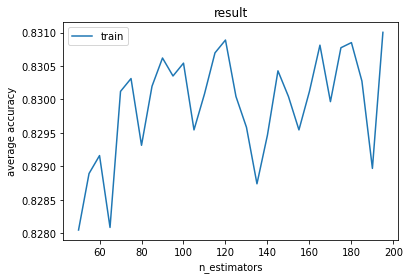

In [13]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("n_estimators")
axs.plot(range(50,200,5),train_s,label="train")
axs.legend()

In [14]:
train_min_id = train_s.index(max(train_s))
print(f'Best n_estimators in training data: {train_min_id*5 + 50} \t error: {1-max(train_s)}')

Best n_estimators in training data: 195 	 error: 0.16899572137846042


In [15]:
improved_n_estimators = train_min_id*5 + 50

## Using K-fold cross-validation to get better max_depth

In [8]:
valid_s = []
train_s = []


for i in range(1, 20):

    rf = RandomForestClassifier(
                        max_depth = i
                        
                       )
    tr_s = cross_val_score(rf, X_train, y_train,cv=3)
    train_s.append(tr_s.mean())

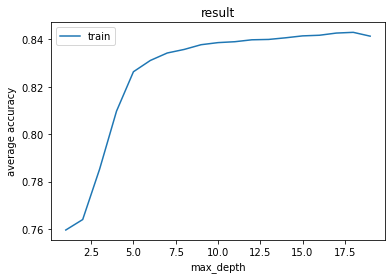

In [9]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("max_depth")
axs.plot(range(1, 20),train_s,label="train")
axs.legend()

In [10]:
train_min_id = train_s.index(max(train_s))
print(f'Best max_depth in training data: {train_min_id + 1} \t error: {1.0-max(train_s)}')

Best max_depth in training data: 18 	 error: 0.15697939653697313


In [11]:
improved_max_depth = train_min_id + 1

## Using K-fold cross-validation to get min_samples_leaf

In [16]:
valid_s = []
train_s = []


for i in range(1, 20):

    rf = RandomForestClassifier(
                       min_samples_leaf=i
                        
                       )
    tr_s = cross_val_score(rf, X_train, y_train,cv=3)
    train_s.append(tr_s.mean())

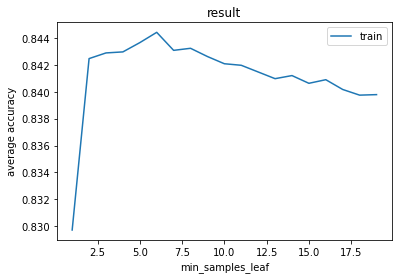

In [17]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("min_samples_leaf")
axs.plot(range(1, 20),train_s,label="train")
axs.legend()

In [18]:
train_min_id = train_s.index(max(train_s))
print(f'Best min_samples_leaf in training data: {train_min_id + 1} \t error: {1.0-max(train_s)}')

Best min_samples_leaf in training data: 6 	 error: 0.15555885944895242


## Using K-fold cross-validation to get min_impurity_decrease

In [19]:
valid_s = []
train_s = []


for i in range(11):

    rf = RandomForestClassifier(
                       min_impurity_decrease = i/10.0
                        
                       )
    tr_s = cross_val_score(rf, X_train, y_train,cv=3)
    train_s.append(tr_s.mean())

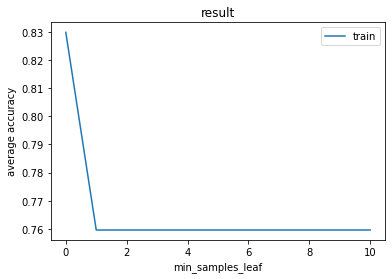

In [20]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("min_samples_leaf")
axs.plot(range(11),train_s,label="train")
axs.legend()

In [21]:
train_min_id = train_s.index(max(train_s))
print(f'Best min_impurity_decrease in training data: {train_min_id} \t error: {1.0-max(train_s)}')

Best min_impurity_decrease in training data: 0 	 error: 0.17018587026846932


In [22]:
improved_min_sample_leaf = train_min_id

## testing bootstrap

In [27]:
default_rf = RandomForestClassifier()
rf = RandomForestClassifier(bootstrap=False)

In [30]:
print(f"default training valid acc = {cross_val_score(default_rf, X_train, y_train,cv=3).mean()}")
print(f"training valid acc (boostrap = False) = {cross_val_score(rf, X_train, y_train,cv=3).mean()}")

default training valid acc = 0.8306971208877173
training valid acc (boostrap = False) = 0.8258598928645356


## Final evulation and fine tune

In [31]:
print(f"n_estimators = {195}")
print(f"max_depth = {18}")
print(f"bootstrap = {True}")
print(f"min_impurity_decrease = {0.0}")
print(f"min_samples_leaf = {6}")

n_estimators = 195
max_depth = 18
bootstrap = True
min_impurity_decrease = 0.0
min_samples_leaf = 6


In [58]:
improved_rf = RandomForestClassifier(
                                        n_estimators = 195,
                                        
                                        bootstrap = True,
                                        min_impurity_decrease = 0.0,
                                        min_samples_leaf = 6
                                        )

In [59]:
improved_cross_validation_errors = 1.0 - cross_val_score(improved_rf, X_train, y_train,cv=3).mean()
print(f'improved_cross-validation errors: {improved_cross_validation_errors}')

improved_cross-validation errors: 0.156057963130796


In [60]:
t = improved_rf.fit(X_train, y_train)

In [61]:
improved_training_error = 1-float(t.score(X_train, y_train))
print(f"improved_training_error = {improved_training_error}");

improved_training_error = 0.14066339066339062


In [62]:
improved_test_error = 1.0 - np.mean(improved_rf.predict(X_test) == y_test)
print(f"improved_test_error = {improved_test_error}")

improved_test_error = 0.15257048092868986


# Final result

In [63]:
print(f"n_estimators = {195}")
print(f"max_depth = {None}")
print(f"bootstrap = {True}")
print(f"min_impurity_decrease = {0.0}")
print(f"min_samples_leaf = {6}")

n_estimators = 195
max_depth = None
bootstrap = True
min_impurity_decrease = 0.0
min_samples_leaf = 6


# Reference

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
